<a href="https://www.kaggle.com/code/mazensafty/titanic-prediction?scriptVersionId=199394584" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Ttitanic Prediction Model

### Problem Definition
* Predict surviving of person
* Get insights why not survived?

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# Data Understanding

In [2]:
titanic_data = pd.read_csv("/kaggle/input/titanic/train.csv")

titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


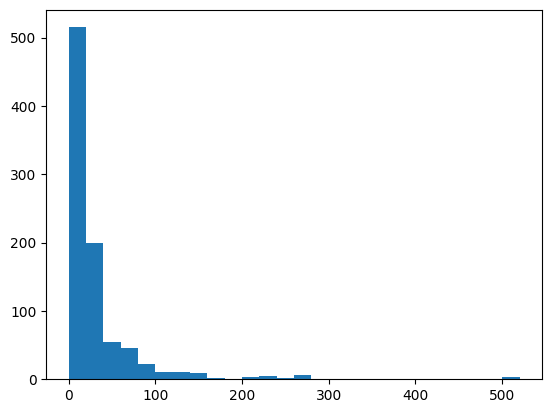

In [5]:
bins = np.arange(0 , titanic_data["Fare"].max() + 20 , 20)
plt.hist(data = titanic_data , x = "Fare" , bins = bins);

In [6]:
titanic_data["Fare"].skew()

4.787316519674893

In [7]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Cleaning and Preprocessing

### Check For Duplicates


In [8]:
titanic_data.duplicated().sum()

0

### Handle Missing Data

In [9]:
missing = titanic_data.isnull().sum()
print(missing , "\n")

total_cells = np.product(titanic_data.shape)
total_missing = missing.sum()

missing_percent = (total_missing / total_cells) * 100
print(missing_percent , "%" , sep = '')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

8.099513655069211%


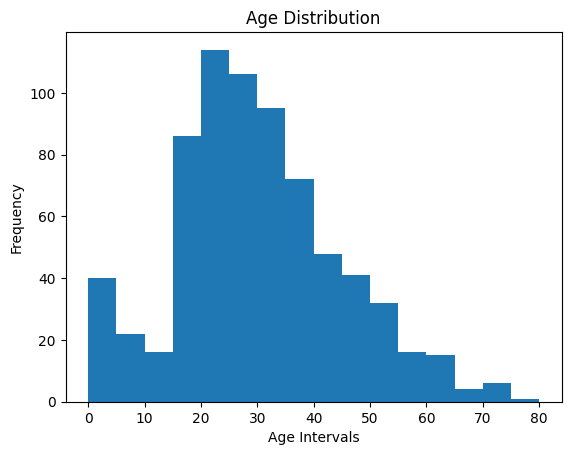

In [10]:
bins = np.arange(0 , titanic_data["Age"].max() + 5 , 5)
plt.hist(data = titanic_data , x = "Age" , bins = bins)
plt.title('Age Distribution')
plt.xlabel('Age Intervals')
plt.ylabel('Frequency');

#### The age is normaly distribuated so filling the null values with mean is the best way

In [11]:
mean_age = titanic_data["Age"].mean()

titanic_data["Age"] = titanic_data["Age"].fillna(mean_age)
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Drop cabin cloumn because the null values is more than 50% of data in that column 

In [12]:
titanic_data = titanic_data.drop(columns = "Cabin" , axis = 1) 
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

#### we droped ebarked column because titanic is sank after crossing all three distination so its not important feature

In [13]:
titanic_data["Embarked"] = titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0])
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data Analysis

In [14]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


##### How many males and females ?

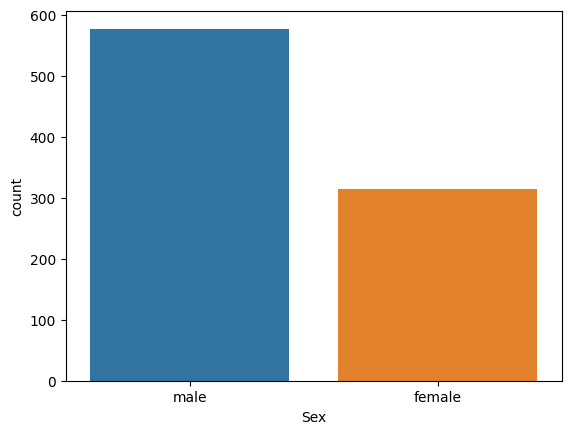

In [15]:
sns.countplot(data = titanic_data , x = "Sex");

##### How many survivors ?


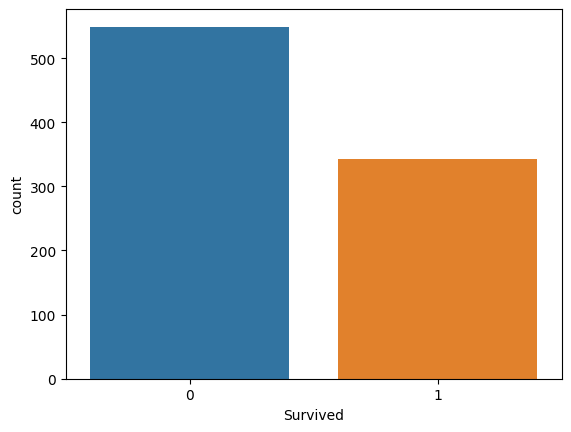

In [16]:
sns.countplot(data = titanic_data , x = "Survived");

##### How many survivors in each male and female ?

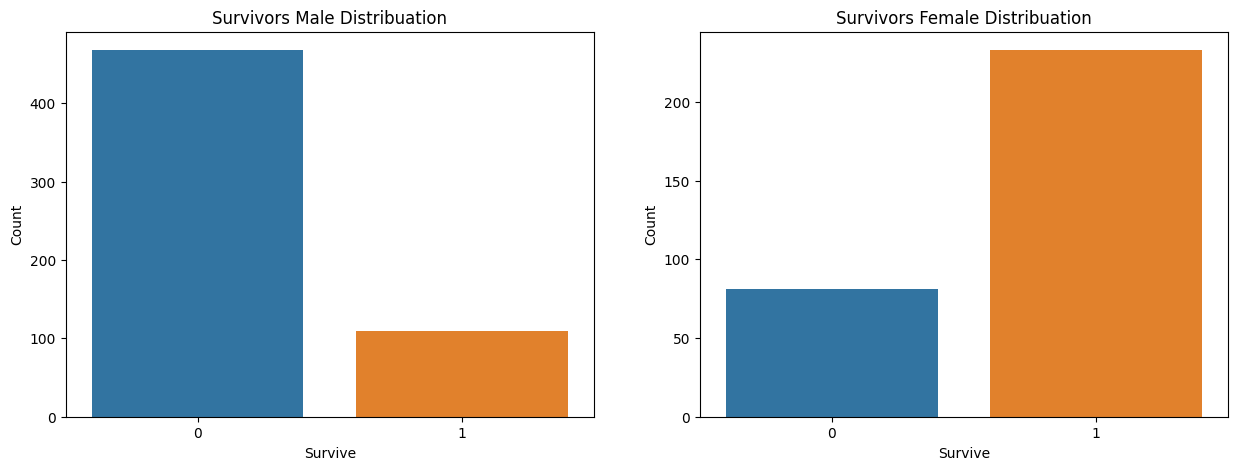

In [17]:
male_data = titanic_data[titanic_data["Sex"] == "male"]
female_data = titanic_data[titanic_data["Sex"] == "female"]
plt.figure(figsize = [15,5])

plt.subplot(1 , 2 , 1)
sns.countplot(data = male_data , x = "Survived")
plt.title("Survivors Male Distribuation")
plt.xlabel("Survive")
plt.ylabel("Count")

plt.subplot(1 , 2 , 2)
sns.countplot(data = female_data , x = "Survived")
plt.title("Survivors Female Distribuation")
plt.xlabel("Survive")
plt.ylabel("Count");

##### male survivors ?

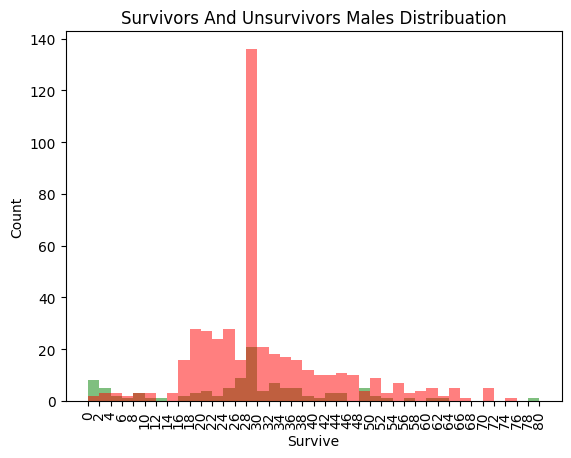

In [18]:
survived_male = titanic_data[(titanic_data["Sex"] == "male") & (titanic_data["Survived"] == 1)]
unsurvived_male = titanic_data[(titanic_data["Sex"] == "male") & (titanic_data["Survived"] == 0)]

bins = np.arange(0 , titanic_data["Age"].max() + 2 , 2)
plt.hist(data = survived_male , x = "Age" , bins = bins , color = "green" , alpha=0.5)
plt.hist(data = unsurvived_male , x = "Age" , bins = bins , color = "red" , alpha=0.5)
plt.title("Survivors And Unsurvivors Males Distribuation")
plt.xlabel("Survive")
plt.ylabel("Count")
plt.xticks(bins , rotation = 90);

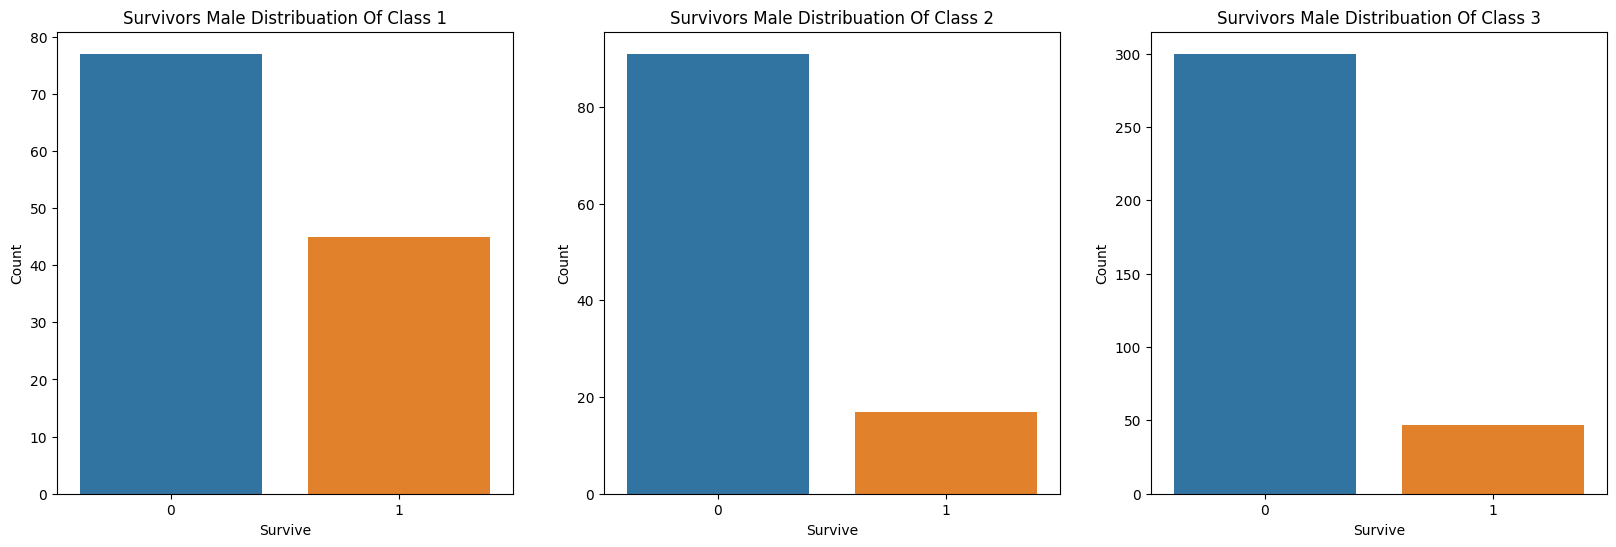

In [19]:
men_survivors_1 = titanic_data[(titanic_data["Sex"] == "male") & (titanic_data["Pclass"] == 1)]
men_survivors_2 = titanic_data[(titanic_data["Sex"] == "male") & (titanic_data["Pclass"] == 2)]
men_survivors_3 = titanic_data[(titanic_data["Sex"] == "male") & (titanic_data["Pclass"] == 3)]

plt.figure(figsize = [20,6])

plt.subplot(1 , 3 , 1)
sns.countplot(data = men_survivors_1 , x = "Survived")
plt.title("Survivors Male Distribuation Of Class 1")
plt.xlabel("Survive")
plt.ylabel("Count")

plt.subplot(1 , 3 , 2)
sns.countplot(data = men_survivors_2 , x = "Survived")
plt.title("Survivors Male Distribuation Of Class 2")
plt.xlabel("Survive")
plt.ylabel("Count")

plt.subplot(1 , 3 , 3)
sns.countplot(data = men_survivors_3 , x = "Survived")
plt.title("Survivors Male Distribuation Of Class 3")
plt.xlabel("Survive")
plt.ylabel("Count");

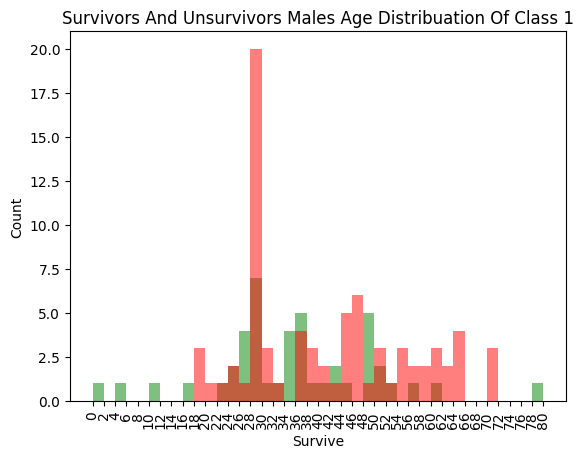

In [20]:
survived_1 = men_survivors_1[men_survivors_1['Survived'] == 1]
not_survived_1 = men_survivors_1[men_survivors_1['Survived'] == 0]

bins = np.arange(0 , titanic_data["Age"].max() + 2 , 2)
plt.hist(data = survived_1 , x = "Age" , bins = bins , color = "green" , alpha=0.5)
plt.hist(data = not_survived_1 , x = "Age" , bins = bins , color = "red" , alpha=0.5)
plt.title("Survivors And Unsurvivors Males Age Distribuation Of Class 1")
plt.xlabel("Survive")
plt.ylabel("Count")
plt.xticks(bins , rotation = 90);

##### Female survivors ?

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


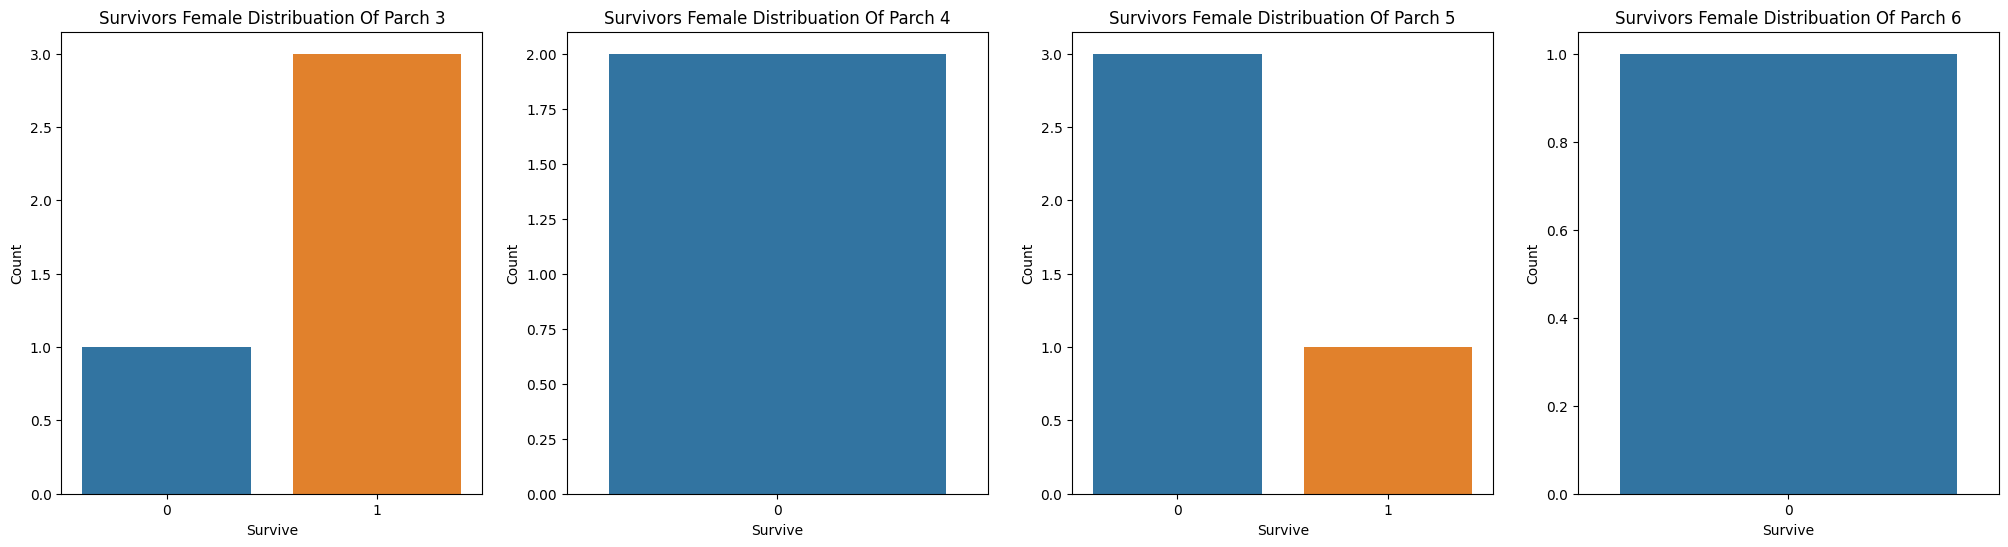

In [21]:
female_survivors_3 = titanic_data[(titanic_data["Sex"] == "female") & (titanic_data["Parch"] == 3)]
female_survivors_4 = titanic_data[(titanic_data["Sex"] == "female") & (titanic_data["Parch"] == 4)]
female_survivors_5 = titanic_data[(titanic_data["Sex"] == "female") & (titanic_data["Parch"] == 5)]
female_survivors_6 = titanic_data[(titanic_data["Sex"] == "female") & (titanic_data["Parch"] == 6)]

plt.figure(figsize = [25,6])

plt.subplot(1 , 4 , 1)
sns.countplot(data = female_survivors_3 , x = "Survived")
plt.title("Survivors Female Distribuation Of Parch 3")
plt.xlabel("Survive")
plt.ylabel("Count")

plt.subplot(1 , 4 , 2)
sns.countplot(data = female_survivors_4 , x = "Survived")
plt.title("Survivors Female Distribuation Of Parch 4")
plt.xlabel("Survive")
plt.ylabel("Count")

plt.subplot(1 , 4 , 3)
sns.countplot(data = female_survivors_5 , x = "Survived")
plt.title("Survivors Female Distribuation Of Parch 5")
plt.xlabel("Survive")
plt.ylabel("Count")

plt.subplot(1 , 4 , 4)
sns.countplot(data = female_survivors_6 , x = "Survived")
plt.title("Survivors Female Distribuation Of Parch 6")
plt.xlabel("Survive")
plt.ylabel("Count");

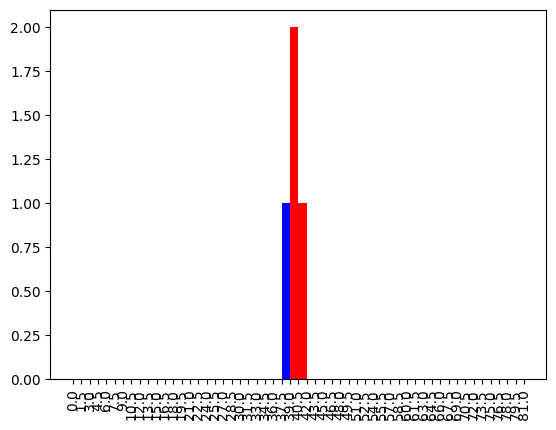

In [22]:
sur_female_parch5 = titanic_data[(titanic_data["Sex"] == "female") & (titanic_data["Survived"] == 1) & (titanic_data["Parch"] == 5)]
unsur_female_parch5 = titanic_data[(titanic_data["Sex"] == "female") & (titanic_data["Survived"] == 0) & (titanic_data["Parch"] == 5)]

bins = np.arange(0 , titanic_data["Age"].max() + 1.5 , 1.5)
plt.hist(data = sur_female_parch5 , x = "Age" , bins = bins , color = "blue")
plt.hist(data = unsur_female_parch5 , x = "Age" , bins = bins , color = "red")
plt.xticks(rotation = 90)
plt.xticks(bins);

# Prepare Data For ML

## Feature Scaling

In [23]:
numeric_data = titanic_data.select_dtypes(include = ["int64" , "float64"])
numeric_data = numeric_data.drop(["Survived" , "Pclass" ,"PassengerId"] , axis = 1)
numeric_data

,Age,SibSp,Parch,Fare
0,22.000000,1,0,7.2500
1,38.000000,1,0,71.2833
2,26.000000,0,0,7.9250
3,35.000000,1,0,53.1000
4,35.000000,0,0,8.0500
...,...,...,...,...
886,27.000000,0,0,13.0000
887,19.000000,0,0,30.0000
888,29.699118,1,2,23.4500
889,26.000000,0,0,30.0000


In [24]:
scaler_features = MinMaxScaler()
titanic_data[numeric_data.columns] = scaler_features.fit_transform(titanic_data[numeric_data.columns])

#### Encoding Categorical Variables

In [25]:
le = LabelEncoder()
titanic_data["Sex"] = le.fit_transform(titanic_data["Sex"])
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0.271174,0.125,0.000000,A/5 21171,0.014151,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,0.125,0.000000,PC 17599,0.139136,C
2,3,1,3,"Heikkinen, Miss. Laina",0,0.321438,0.000,0.000000,STON/O2. 3101282,0.015469,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,0.125,0.000000,113803,0.103644,S
4,5,0,3,"Allen, Mr. William Henry",1,0.434531,0.000,0.000000,373450,0.015713,S
5,6,0,3,"Moran, Mr. James",1,0.367921,0.000,0.000000,330877,0.016510,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,0.673285,0.000,0.000000,17463,0.101229,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,0.019854,0.375,0.166667,349909,0.041136,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,0.334004,0.000,0.333333,347742,0.021731,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,0.170646,0.125,0.000000,237736,0.058694,C


## One-Hot Encoding

In [26]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False , handle_unknown = "ignore")

features_cat = encoder.fit_transform(titanic_data[["Ticket","Embarked"]])
features_cat

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [27]:
encoder.get_feature_names_out(["Ticket","Embarked"])

array(['Ticket_110152', 'Ticket_110413', 'Ticket_110465', 'Ticket_110564',
       'Ticket_110813', 'Ticket_111240', 'Ticket_111320', 'Ticket_111361',
       'Ticket_111369', 'Ticket_111426', 'Ticket_111427', 'Ticket_111428',
       'Ticket_112050', 'Ticket_112052', 'Ticket_112053', 'Ticket_112058',
       'Ticket_112059', 'Ticket_112277', 'Ticket_112379', 'Ticket_113028',
       'Ticket_113043', 'Ticket_113050', 'Ticket_113051', 'Ticket_113055',
       'Ticket_113056', 'Ticket_113059', 'Ticket_113501', 'Ticket_113503',
       'Ticket_113505', 'Ticket_113509', 'Ticket_113510', 'Ticket_113514',
       'Ticket_113572', 'Ticket_113760', 'Ticket_113767', 'Ticket_113773',
       'Ticket_113776', 'Ticket_113781', 'Ticket_113783', 'Ticket_113784',
       'Ticket_113786', 'Ticket_113787', 'Ticket_113788', 'Ticket_113789',
       'Ticket_113792', 'Ticket_113794', 'Ticket_113796', 'Ticket_113798',
       'Ticket_113800', 'Ticket_113803', 'Ticket_113804', 'Ticket_113806',
       'Ticket_113807', '

In [28]:
encoded_df = pd.DataFrame(features_cat , columns = encoder.get_feature_names_out(["Ticket","Embarked"]) , index = titanic_data.index)
encoded_df

,Ticket_110152,Ticket_110413,Ticket_110465,Ticket_110564,Ticket_110813,Ticket_111240,Ticket_111320,Ticket_111361,Ticket_111369,Ticket_111426,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
numeric = titanic_data.select_dtypes(include = ["int64" , "float64" , "int32"])
numeric

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,0.271174,0.125,0.000000,0.014151
1,2,1,1,0,0.472229,0.125,0.000000,0.139136
2,3,1,3,0,0.321438,0.000,0.000000,0.015469
3,4,1,1,0,0.434531,0.125,0.000000,0.103644
4,5,0,3,1,0.434531,0.000,0.000000,0.015713
...,...,...,...,...,...,...,...,...
886,887,0,2,1,0.334004,0.000,0.000000,0.025374
887,888,1,1,0,0.233476,0.000,0.000000,0.058556
888,889,0,3,0,0.367921,0.125,0.333333,0.045771
889,890,1,1,1,0.321438,0.000,0.000000,0.058556


In [30]:
titanic_data = pd.concat([numeric , encoded_df] , axis = 1)

In [31]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket_110152,Ticket_110413,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,0.271174,0.125,0.000000,0.014151,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,1,0,0.472229,0.125,0.000000,0.139136,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,0,0.321438,0.000,0.000000,0.015469,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,1,0,0.434531,0.125,0.000000,0.103644,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,0,3,1,0.434531,0.000,0.000000,0.015713,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,6,0,3,1,0.367921,0.000,0.000000,0.016510,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,7,0,1,1,0.673285,0.000,0.000000,0.101229,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,8,0,3,1,0.019854,0.375,0.166667,0.041136,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,9,1,3,0,0.334004,0.000,0.333333,0.021731,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,10,1,2,0,0.170646,0.125,0.000000,0.058694,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Feature Selection

In [32]:
titanic_data = titanic_data.drop(columns = ["PassengerId"])
titanic_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket_110152,Ticket_110413,Ticket_110465,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0.271174,0.125,0.000000,0.014151,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,0,0.472229,0.125,0.000000,0.139136,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,3,0,0.321438,0.000,0.000000,0.015469,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,0,0.434531,0.125,0.000000,0.103644,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,3,1,0.434531,0.000,0.000000,0.015713,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0,3,1,0.367921,0.000,0.000000,0.016510,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0,1,1,0.673285,0.000,0.000000,0.101229,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0,3,1,0.019854,0.375,0.166667,0.041136,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,1,3,0,0.334004,0.000,0.333333,0.021731,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,1,2,0,0.170646,0.125,0.000000,0.058694,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
y = titanic_data["Survived"]
X = titanic_data.drop(["Survived"] , axis = 1)

print(y)
X.head()

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket_110152,Ticket_110413,Ticket_110465,Ticket_110564,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0.271174,0.125,0.0,0.014151,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,0.472229,0.125,0.0,0.139136,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,0,0.321438,0.000,0.0,0.015469,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0.434531,0.125,0.0,0.103644,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,1,0.434531,0.000,0.0,0.015713,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=0)

# Build The Model

## Preformance Metrics

In [35]:
from sklearn.metrics import accuracy_score

def performance(y_true , y_predict):
    score = accuracy_score(y_true , y_predict)
    
    return score

## Learning Curves

In [36]:
from sklearn.model_selection import learning_curve 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.model_selection import ShuffleSplit, train_test_split

def draw_learning_curves(X, y, estimator, num_trainings):
    cv1 = ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv1, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings),scoring = 'r2')
    
    print("train size :\n",train_sizes)
    print()
    print(train_scores)
    train_scores_mean = np.mean(train_scores, axis=1)
    print("train score mean:\n",train_scores_mean)
    print()
    #train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    #test_scores_std = np.std(test_scores, axis=1)

    plt.grid();

    plt.title("Learning Curves");
    plt.xlabel("Training examples");
    plt.ylabel("Score");

    plt.plot(train_sizes,train_scores_mean, 'o-', color="g",
             label="Training score");
    plt.plot(train_sizes,test_scores_mean, 'o-', color="y",
             label="Cross-validation score");
    plt.legend(loc="best");

train size :
 [ 71 142 213 284 356 427 498 569 640 712]

[[ 0.10353535  0.08387097  0.12095238  0.08974359 -0.01913876  0.13414634
   0.07642276 -0.35238095 -0.15447154  0.18390805]
 [-0.09230769  0.05846896  0.24145299 -0.13552189  0.01869919  0.13341751
   0.14406269 -0.20851064  0.05647841  0.07208495]
 [ 0.01407519  0.16736364  0.13019943  0.07443794 -0.03602954  0.04569892
   0.07054545 -0.12520853  0.07913534 -0.0282496 ]
 [ 0.0276087   0.25042695  0.05940171  0.08183167 -0.07290178  0.06520376
   0.10345184 -0.11701082  0.09784929  0.01869919]
 [ 0.03833766  0.23034591  0.07852629  0.06002674  0.02665755  0.09351852
   0.05820106 -0.03871077  0.05579684  0.07831715]
 [ 0.07509025  0.21812772  0.01658222  0.09329271  0.05006651  0.13820467
   0.07152667  0.03519683  0.06175326  0.02696178]
 [ 0.04297694  0.17838384  0.02171216  0.10824224  0.06093604  0.15176147
   0.07777778  0.04950393  0.06260399  0.03681473]
 [ 0.0755114   0.12382246  0.05226367  0.15797262  0.06932004  0.153

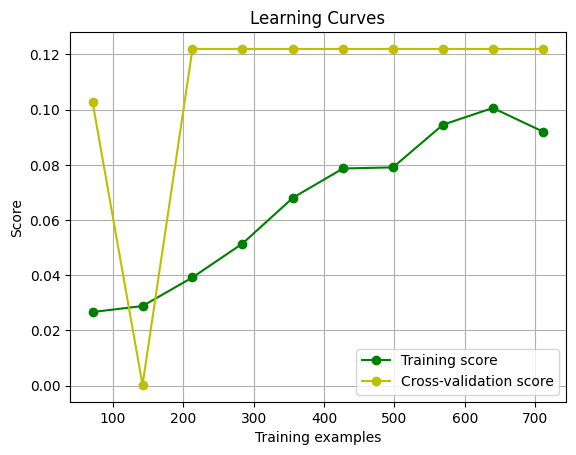

In [37]:
from sklearn.tree import DecisionTreeClassifier
estimator=DecisionTreeClassifier(max_depth=1,random_state=0)
draw_learning_curves(X, y, estimator, 10);

train size :
 [ 71 142 213 284 356 427 498 569 640 712]

[[0.46212121 0.54193548 0.72952381 0.54487179 0.60366826 0.30731707
  0.53821138 0.32380952 0.59593496 0.76683087]
 [0.33247863 0.42937513 0.54487179 0.25294613 0.42276423 0.25294613
  0.31525015 0.20492721 0.43978405 0.42005309]
 [0.35613074 0.38036364 0.43361823 0.31588891 0.21338498 0.25564516
  0.28354545 0.19063948 0.39943609 0.23833363]
 [0.33630435 0.42679708 0.28696581 0.41297435 0.23157035 0.31745037
  0.25042695 0.16224189 0.40842577 0.29288618]
 [0.32190476 0.4052673  0.31787011 0.30989305 0.32793022 0.32896825
  0.18769841 0.20284987 0.32725525 0.26265372]
 [0.29090253 0.41359579 0.24276831 0.27069196 0.34386037 0.33406724
  0.26699474 0.24407174 0.30608835 0.17147241]
 [0.35618449 0.37959596 0.22766749 0.29508672 0.32319715 0.3281279
  0.32090909 0.20363843 0.29695299 0.16136455]
 [0.30284466 0.30053054 0.26121341 0.35344326 0.3056832  0.32447489
  0.32954225 0.25638412 0.25241518 0.23042739]
 [0.31651852 0.34167215 

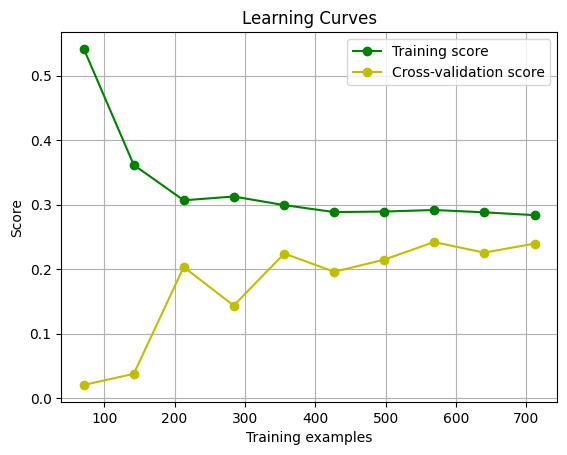

In [38]:
from sklearn.tree import DecisionTreeClassifier
estimator=DecisionTreeClassifier(max_depth=3,random_state=0)
draw_learning_curves(X, y, estimator, 10);

train size :
 [ 71 142 213 284 356 427 498 569 640 712]

[[0.88047138 0.88548387 1.         0.94310897 1.         0.65365854
  0.76910569 0.93238095 1.         1.        ]
 [0.57521368 0.88587503 0.87863248 0.82070707 0.82682927 0.43223906
  0.65762508 0.55475924 0.7051495  0.88401062]
 [0.61770263 0.76763636 0.85840456 0.69818628 0.65465682 0.63736559
  0.63209091 0.58544949 0.81983083 0.67629179]
 [0.69130435 0.69135227 0.66623932 0.6989612  0.55054115 0.61421108
  0.55907468 0.55907468 0.7337916  0.59593496]
 [0.66711688 0.66181866 0.58114831 0.52406417 0.51332878 0.57619048
  0.52910053 0.55311281 0.59871366 0.58524272]
 [0.53754513 0.66770428 0.58696453 0.53679084 0.55930921 0.48096418
  0.49178302 0.57230375 0.56019684 0.56646812]
 [0.58238994 0.58919192 0.5366005  0.52439586 0.46701775 0.50449433
  0.5640404  0.5033444  0.52293239 0.50180072]
 [0.57564458 0.49196429 0.50747561 0.5113234  0.47556923 0.53232877
  0.50444427 0.46459657 0.51626865 0.42098823]
 [0.51754248 0.52600395

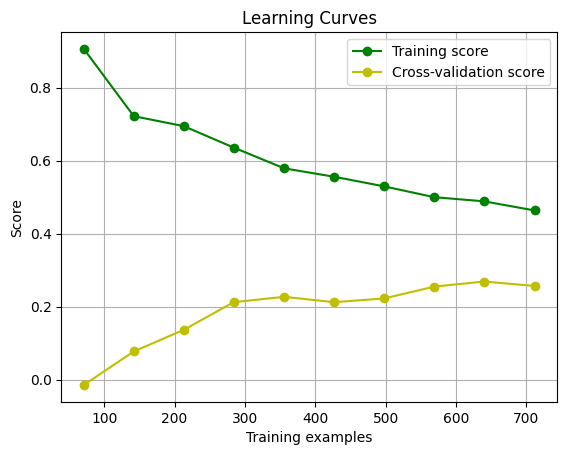

In [39]:
from sklearn.tree import DecisionTreeClassifier
estimator=DecisionTreeClassifier(max_depth=6,random_state=0)
draw_learning_curves(X, y, estimator, 10);

train size :
 [ 71 142 213 284 356 427 498 569 640 712]

[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [0.75726496 1.         1.         1.         1.         0.73106061
  0.85734378 0.74557671 0.8230897  1.        ]
 [0.73842811 0.90318182 1.         0.93963726 0.98081427 0.92365591
  0.96127273 0.802595   0.95996241 0.88575004]
 [0.87652174 0.91181494 0.96965812 0.93979224 0.94200531 0.91097179
  0.91181494 0.70604979 0.89647451 0.82682927]
 [0.81506494 0.89504717 0.89229528 0.88101604 0.69872734 0.76455026
  0.83518519 0.75843936 0.81115937 0.79262136]
 [0.80474128 0.88271916 0.85248733 0.83245626 0.7943443  0.71599927
  0.77521172 0.71155369 0.80453193 0.75914896]
 [0.79119497 0.81555556 0.72539289 0.81315552 0.72081882 0.67246235
  0.77363636 0.73454614 0.79912943 0.7259904 ]
 [0.71962231 0.74966356 0.77612528 0.78949316 0.73409144 0.67337247
  0.78137247 0.68768133 0.71415874 0.69950022]
 [0.74536964 0.7564187  0.69384

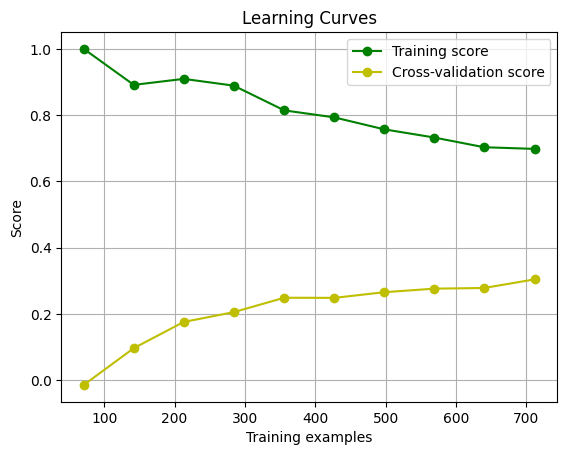

In [40]:
from sklearn.tree import DecisionTreeClassifier
estimator=DecisionTreeClassifier(max_depth=10,random_state=0)
draw_learning_curves(X, y, estimator, 10);

## Complexity

In [41]:
import sklearn.model_selection as curves
def ModelComplexity(X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv1 = ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None)
    
    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)

    # Calculate the training and testing scores
    train_scores, test_scores = curves.validation_curve(DecisionTreeClassifier(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv1, scoring = 'r2')
    #print("train_scores =\n",train_scores)
    #print("test_scores =\n",test_scores)
    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(5, 5))
    plt.title('Decision Tree Classifier Complexity Performance')
    plt.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    
    
    # Visual aesthetics
    plt.legend(loc = 'best')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Score')
   


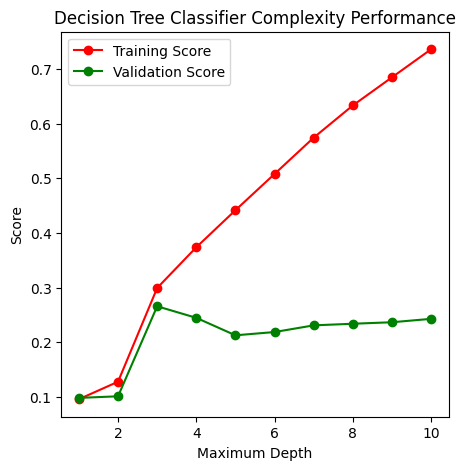

In [42]:
ModelComplexity(X_train, y_train)

## GridSearch

In [43]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def fit_model(X , y):
    
    cv_sets = ShuffleSplit(n_splits = 5 , random_state = 0 , test_size = 0.2 , train_size = None)
    
    Classifier = DecisionTreeClassifier(random_state=0)

    params = {"max_depth" : [2,4,5,6,8,9,10,12] , 'min_samples_leaf':[2,4,5,6,7,8,10],'min_samples_split':[2,3,4,5,6,7]}
    
    scoring = make_scorer(performance)
    
    grid = GridSearchCV(estimator=Classifier, param_grid= params, scoring=scoring,cv=cv_sets)
    
    grid = grid.fit(X, y)
    
    return grid.best_estimator_

In [44]:
clas = fit_model(X_train , y_train)
print("Parameter 'max_depth' is {} for the optimal model.".format(clas.get_params()['max_depth']))
print("Parameter 'min_samples_leaf' is {} for the optimal model.".format(clas.get_params()['min_samples_leaf']))
print("Parameter 'min_samples_split' is {} for the optimal model.".format(clas.get_params()['min_samples_split']))

Parameter 'max_depth' is 6 for the optimal model.
Parameter 'min_samples_leaf' is 5 for the optimal model.
Parameter 'min_samples_split' is 2 for the optimal model.


In [45]:
clas.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=0)

In [46]:
train_predict = clas.predict(X_train)
test_predict = clas.predict(X_test)

train_score = performance(y_train , train_predict)
test_score = performance(y_test , test_predict)

print("The Train Score Is : " , train_score)
print("The Test Score Is : " , test_score)

The Train Score Is :  0.8595505617977528
The Test Score Is :  0.8491620111731844


# Make Predictions

In [47]:
test = pd.read_csv("/kaggle/input/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [49]:
test["Age"] = test["Age"].fillna(mean_age)
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [50]:
test = test.drop("Cabin" , axis = 1)
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [51]:
test["Fare"] = test["Fare"].fillna(test["Fare"].median())
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [52]:
numeric_data = test.select_dtypes(include = ["int64" , "float64"])
numeric_data = numeric_data.drop(["Pclass" ,"PassengerId"] , axis = 1)
numeric_data

,Age,SibSp,Parch,Fare
0,34.500000,0,0,7.8292
1,47.000000,1,0,7.0000
2,62.000000,0,0,9.6875
3,27.000000,0,0,8.6625
4,22.000000,1,1,12.2875
...,...,...,...,...
413,29.699118,0,0,8.0500
414,39.000000,0,0,108.9000
415,38.500000,0,0,7.2500
416,29.699118,0,0,8.0500


In [53]:
test[numeric_data.columns] = scaler_features.transform(test[numeric_data.columns])

In [54]:
test["Sex"] = le.transform(test["Sex"])
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,0.428248,0.000,0.000000,330911,0.015282,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,0.585323,0.125,0.000000,363272,0.013663,S
2,894,2,"Myles, Mr. Thomas Francis",1,0.773813,0.000,0.000000,240276,0.018909,Q
3,895,3,"Wirz, Mr. Albert",1,0.334004,0.000,0.000000,315154,0.016908,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,0.271174,0.125,0.166667,3101298,0.023984,S
5,897,3,"Svensson, Mr. Johan Cervin",1,0.170646,0.000,0.000000,7538,0.018006,S
6,898,3,"Connolly, Miss. Kate",0,0.371701,0.000,0.000000,330972,0.014891,Q
7,899,2,"Caldwell, Mr. Albert Francis",1,0.321438,0.125,0.166667,248738,0.056604,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,0.220910,0.000,0.000000,2657,0.014110,C
9,901,3,"Davies, Mr. John Samuel",1,0.258608,0.250,0.000000,A/4 48871,0.047138,S


In [55]:
features_cat = encoder.transform(test[["Ticket","Embarked"]])
features_cat

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [56]:
numeric = test.select_dtypes(include = ["int64" , "float64" , "int32"])
numeric

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,0.428248,0.000,0.000000,0.015282
1,893,3,0,0.585323,0.125,0.000000,0.013663
2,894,2,1,0.773813,0.000,0.000000,0.018909
3,895,3,1,0.334004,0.000,0.000000,0.016908
4,896,3,0,0.271174,0.125,0.166667,0.023984
...,...,...,...,...,...,...,...
413,1305,3,1,0.367921,0.000,0.000000,0.015713
414,1306,1,0,0.484795,0.000,0.000000,0.212559
415,1307,3,1,0.478512,0.000,0.000000,0.014151
416,1308,3,1,0.367921,0.000,0.000000,0.015713


In [57]:
encoded_df = pd.DataFrame(features_cat , columns = encoder.get_feature_names_out(["Ticket","Embarked"]) , index = test.index)
encoded_df

,Ticket_110152,Ticket_110413,Ticket_110465,Ticket_110564,Ticket_110813,Ticket_111240,Ticket_111320,Ticket_111361,Ticket_111369,Ticket_111426,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [58]:
test = pd.concat([numeric , encoded_df] , axis = 1)

In [59]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket_110152,Ticket_110413,Ticket_110465,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,0.428248,0.000,0.000000,0.015282,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,893,3,0,0.585323,0.125,0.000000,0.013663,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,894,2,1,0.773813,0.000,0.000000,0.018909,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,895,3,1,0.334004,0.000,0.000000,0.016908,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,896,3,0,0.271174,0.125,0.166667,0.023984,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [60]:
passid = test[["PassengerId"]]
passid

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [61]:
test = test.drop("PassengerId" , axis = 1)

In [62]:
prediction = clas.predict(test)
prediction = pd.Series(prediction)
prediction = pd.DataFrame({"Survived" : prediction})
prediction

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [63]:
df = pd.concat([passid, prediction], axis=1)
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [64]:
df.to_csv('submission.csv', index=False)